# Logistic Regression Project

In Logistic Regression we want to predict if an event has more probability to be classificated with label A or B (it can be more than 2 labels). The algorithm try to find a cut-off spot where the data can be well separated between the labels. 

# Pros
Easy to understand and explain <br>
Easy to implement <br>
Efficient to small datasets<br>
Its not much necessary to fine tunning <br>
Efficient to linearly separated data <br>

# Cons
It assumes that data is linearly separated. For data that doesn't have this feature, can not be the best model<br>
It's not so good for data with a lot of noise, its important the data to be pre-processed<br>
Inefficient to modelling non linear and very complex relationships (in this case Neural Networks performs better)<br>
Its sensitive to the variables. All variables has the same weight to the algorithm (its important to use just the more correlated variables)<br>

### Learnings
Always pre processing the data<br>
Use just few variables to train the model<br>
Use just variables with more impact to the target<br>

In this small project we are going to work with a fake dataset about advertising. We have data of user behaviour and our target is the "clique" variable, that tells us if the user clicked on the advertising or not. Our objective here is predicting if a random internet user has probability to click in the advertising using Logistic Regression.

* **tempo_diario_site**: daily time spent on the website
* **idade**: user age
* **renda_media_regiao**: Average region income
* **tempo_medio_internet**: Average in minutes spent by the user on internet
* **titulo**: Add title
* **cidade**: User city
* **sexo**: User gender, 0 if female and 1 if male
* **pais**: User country
* **timestamp_clique'**: click on add timestamp
* **clique**: 0 if not clicked and 1 if clicked

## Project steps
- Collect data
- Data analysis
- Model creation and trainning
- Model's metrics and performance
- Results

In [13]:
#imports
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns

# Collect data

In [2]:
#loading data
df = pd.read_csv('advertising.csv')
#show first lines
df.head()

,tempo_diario_site,idade,renda_media_regiao,tempo_medio_internet,titulo,cidade,sexo,pais,timestamp_clique,clique
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
#checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tempo_diario_site     1000 non-null   float64
 1   idade                 1000 non-null   int64  
 2   renda_media_regiao    1000 non-null   float64
 3   tempo_medio_internet  1000 non-null   float64
 4   titulo                1000 non-null   object 
 5   cidade                1000 non-null   object 
 6   sexo                  1000 non-null   int64  
 7   pais                  1000 non-null   object 
 8   timestamp_clique      1000 non-null   object 
 9   clique                1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
#descriptive statistics
df.describe()

,tempo_diario_site,idade,renda_media_regiao,tempo_medio_internet,sexo,clique
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


### Questions 

- Is there any null values? 
    - No
- Does we need to present any variable in a different format? 
    - Yes, timestamp
- Is there any duplicated value?
    - No 
- Any composite variable?
    - Yes, timestamp
- Can we integrate more data to this project?
    - No 
- How about the data? Is the target feature balanced?
    - Yes (the data is already clean and processed for this case)

In [7]:
#checking the target variable balancing
df['clique'].value_counts()

1    500
0    500
Name: clique, dtype: int64

In [8]:
#timestamp is a categorial variable in this dataset, here we are changing its datatype
df['timestamp_clique'] = pd.to_datetime(df['timestamp_clique'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   tempo_diario_site     1000 non-null   float64       
 1   idade                 1000 non-null   int64         
 2   renda_media_regiao    1000 non-null   float64       
 3   tempo_medio_internet  1000 non-null   float64       
 4   titulo                1000 non-null   object        
 5   cidade                1000 non-null   object        
 6   sexo                  1000 non-null   int64         
 7   pais                  1000 non-null   object        
 8   timestamp_clique      1000 non-null   datetime64[ns]
 9   clique                1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 78.2+ KB


In [10]:
#extracting year, month and day from timestamp
df['year'] = df['timestamp_clique'].dt.year
df['month'] = df['timestamp_clique'].dt.month
df['day'] = df['timestamp_clique'].dt.day

In [11]:
df.head()

,tempo_diario_site,idade,renda_media_regiao,tempo_medio_internet,titulo,cidade,sexo,pais,timestamp_clique,clique,year,month,day
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,2016,3,27
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,2016,4,4
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,2016,3,13
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2016,1,10
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,2016,6,3


# Data analysis

In [12]:
#splitting the data between users who clicked and not 
df_sim = df.loc[df['clique']==1].copy()
df_nao = df.loc[df['clique']==0].copy()

### Time spent on the website
Those who clicked

<AxesSubplot:xlabel='tempo_diario_site', ylabel='Count'>

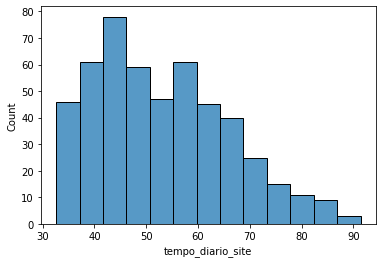

In [14]:
sns.histplot(data=df_sim, x="tempo_diario_site")

Who didn't click

<AxesSubplot:xlabel='tempo_diario_site', ylabel='Count'>

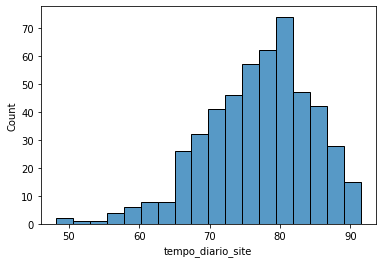

In [15]:
sns.histplot(data=df_nao, x="tempo_diario_site")

<b>Who spent more time on website tends to dont click on the add</b>

### Age
Who clicked

<AxesSubplot:xlabel='idade', ylabel='Count'>

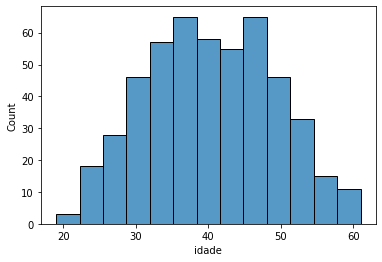

In [16]:
sns.histplot(data=df_sim, x="idade")

Who didn't click

<AxesSubplot:xlabel='idade', ylabel='Count'>

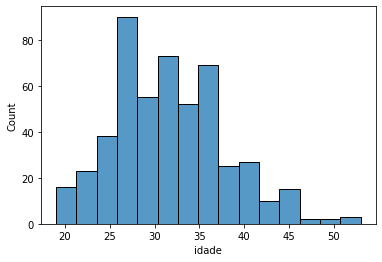

In [17]:
sns.histplot(data=df_nao, x="idade")

<b>Most of those who clicked are between 35 and 45 years old</b>

### We already have 2 informations:
-<b>Who click the add tends to spent less time on the website</b>. If the user spent more than 60 minutes, the probability to don't click is very high.<br>
-<b>Who click has between 35 and 45 years old</b><br>

### Average region income
Who clicked

<AxesSubplot:xlabel='renda_media_regiao', ylabel='Count'>

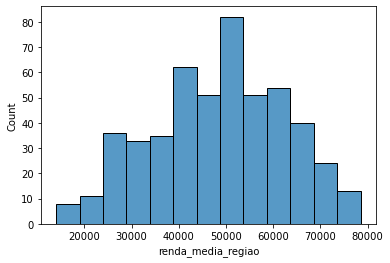

In [18]:
sns.histplot(data=df_sim, x="renda_media_regiao")

Who didn't click

<AxesSubplot:xlabel='renda_media_regiao', ylabel='Count'>

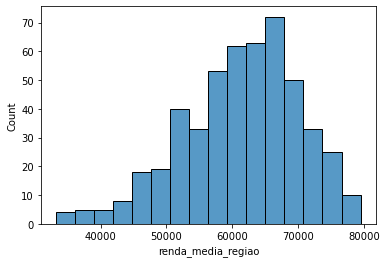

In [19]:
sns.histplot(data=df_nao, x="renda_media_regiao")

<b>Who clicked has the income between 40 and 60k</b>

### Time spent on internet

Who clicked

<AxesSubplot:xlabel='tempo_medio_internet', ylabel='Count'>

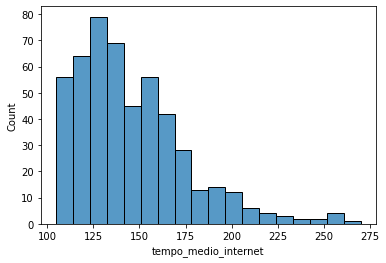

In [24]:
sns.histplot(data=df_sim, x="tempo_medio_internet")

Who didn't click

<AxesSubplot:xlabel='tempo_medio_internet', ylabel='Count'>

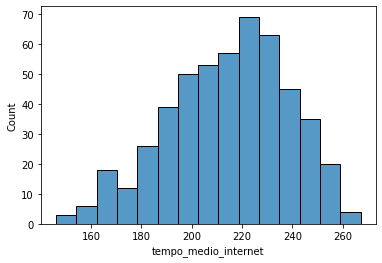

In [25]:
sns.histplot(data=df_nao, x="tempo_medio_internet")

<b>Users that have 175 minutes as max time spent on the internet tends to click more</b>

C:\Users\adeni\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\adeni\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


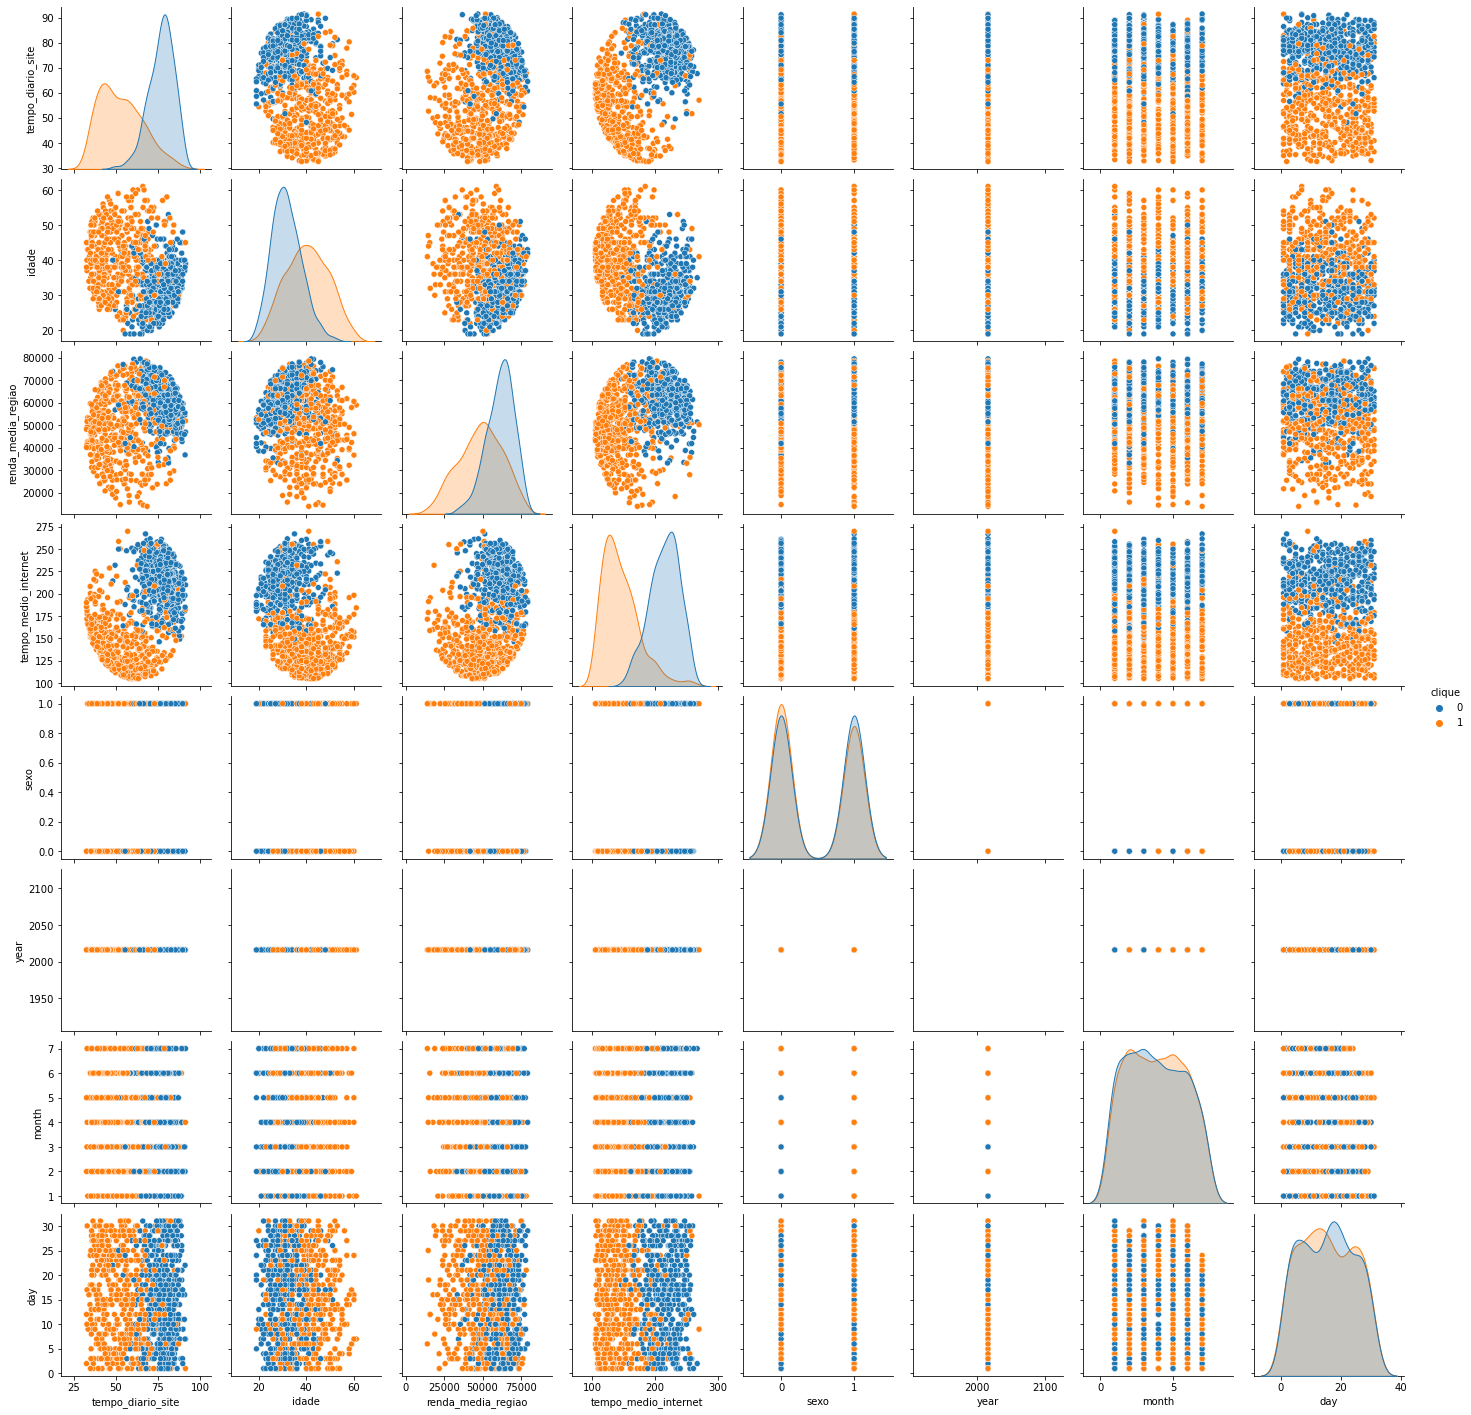

In [27]:
#Distribution of variables looking through the "clique" variable
sns.pairplot(df, hue='clique')

# Model creation and trainning

In [37]:
#Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [38]:
model = LogisticRegression()
#few variables to test
x = df[['tempo_diario_site', 'idade', 'tempo_medio_internet']]

#target
y = df['clique']

#splitting into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [39]:
x_train.head()

,tempo_diario_site,idade,tempo_medio_internet
703,77.65,28,208.01
311,69.74,49,243.37
722,39.47,43,163.48
629,73.94,26,236.15
0,68.95,35,256.09


In [40]:
y_train.head()

703    0
311    0
722    1
629    0
0      0
Name: clique, dtype: int64

In [41]:
#trainning model
model.fit(x_train, y_train)

#generate predicted values
y_predito = model.predict(x_test)

In [42]:
#model performance and metrics
print(classification_report(y_test, y_predito))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       162
           1       0.96      0.93      0.95       168

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330



In [34]:
accuracy_score(y_test, y_predito)

0.9454545454545454

<b>Accuracy (number of correct predictions/number of entries)</b><br>
    Answer the question: how much the model hits the target based on all samples?<br>

<b>Precision (number of right predictions/total of positive class classificated (right + wrong)</b></b><br>
        This metric deserves more attention when we have a problem where is better to classify something as negative and it be positive, than classify as positive and it be negative (eg: a children video classifier. We want to reduce as much as we can what the prediction as positive but in fact is negative.

In [44]:
#testing with more variables
x = df[['tempo_diario_site', 'idade', 'tempo_medio_internet', 'renda_media_regiao']]
y = df['clique']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
model.fit(x_train, y_train)
y_predito = model.predict(x_test)
print(classification_report(y_test, y_predito))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



<b>Accuracy with 4 variables (tempo médio internet, tempo médio site, idade e renda média região) = 91% </b>

Now we are going to test removing one variable, Idade

In [47]:
x = df[['tempo_diario_site', 'tempo_medio_internet', 'renda_media_regiao']]
y = df['clique']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
model.fit(x_train, y_train)
y_predito = model.predict(x_test)
print(classification_report(y_test, y_predito))

              precision    recall  f1-score   support

           0       0.66      0.86      0.74       162
           1       0.81      0.57      0.66       168

    accuracy                           0.71       330
   macro avg       0.73      0.71      0.70       330
weighted avg       0.73      0.71      0.70       330



<b>Accuracy with 3 variables (tempo médio internet, tempo diário site and renda média região) = 71%</b>

<b>Accuracy with 3 variables (tempo médio internet, tempo médio site e idade) = 95% </b><br>
<b>Accuracy with 4 variables (tempo médio internet, tempo médio site, idade e renda média região) = 91% </b><br>
<b>Accuracy with 3 variables (tempo médio internet, tempo médio site e renda média região) = 73%</b><br>

In this case, the best model was the one with 3 variables as we learn at the beginning (less variables, better results)

Its import to mention that here we have well balanced classes (500 examples of each label), the accuracy can be used as principal metric. But in case of unbalanced classes, just accuracy can not be sufficient.

<b>RESULTS</b><br>
With this model, we can use it on production environment to identify the user with more probability to click on an add in real-time, analysing its behaviour while the internet session and make the prediction. <br><br>
Identifying who are the more prone to click in an add, the company can redirect it just to this group of people, generating a more assertive alocation of resources and a greater possibility of return in sales for comunicating just with the users whom that add make sense. 